# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info

<bound method DataFrame.info of                                                title  year
0                             The Ticket to the Life  2009
1       Parallel Worlds: A New Rock Music Experience  2016
2                          Morita - La hija de Jesus  2008
3                                                Gun  2017
4                             Love or Nothing at All  2014
...                                              ...   ...
244909                       Kahit konting pagtingin  1990
244910                                     Dream On!  1981
244911                             The Brain Leeches  1978
244912                                    Kanli para  1953
244913                            Le bleu des villes  1999

[244914 rows x 2 columns]>

In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## THERE IS A PROBLEM!!!

The movie below is a movie released in 2015, not 2115.

In [5]:
movies[movies.year>=2050]

,title,year
78061,100 Years,2115


In [6]:
# Fixing it
movies.year = movies.year.replace(2115, 2015)

## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [7]:
cast = pd.read_csv('cast.csv.zip')
cast.info

<bound method DataFrame.info of                                     title  year                         name  \
0                          Closet Monster  2015                     Buffy #1   
1                         Suuri illusioni  1985                       Homo $   
2                     Battle of the Sexes  2017                      $hutter   
3                    Secret in Their Eyes  2015                      $hutter   
4                              Steve Jobs  2015                      $hutter   
...                                   ...   ...                          ...   
3786171                           Foxtrot  1988            Lilja ??risd?ttir   
3786172  Niceland (Population. 1.000.002)  2004    Sigr??ur J?na ??risd?ttir   
3786173                         Skammdegi  1985           Dalla ??r?ard?ttir   
3786174                      U.S.S.S.S...  2003  Krist?n Andrea ??r?ard?ttir   
3786175                 Bye Bye Blue Bird  1999                 Rosa ? R?gvu   

       

In [8]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [9]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info

<bound method DataFrame.info of                           title  year      country       date
0         #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                         #BKKY  2016     Cambodia 2017-10-12
2                       #Beings  2015      Romania 2015-01-29
3                     #Captured  2017          USA 2017-09-05
4        #Ewankosau saranghaeyo  2015  Philippines 2015-01-21
...                         ...   ...          ...        ...
479483  xXx: State of the Union  2005      Uruguay 2005-04-29
479484  xXx: State of the Union  2005       Poland 2005-06-03
479485  xXx: State of the Union  2005       Turkey 2005-06-03
479486  xXx: State of the Union  2005        China 2005-06-17
479487  xXx: State of the Union  2005       Greece 2005-06-24

[479488 rows x 4 columns]>

In [10]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [15]:
harry_p_df = movies[(movies.title.str.contains('Harry Potter', case=False))]
harry_p_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [16]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
len(movies[movies.year == 2015])

8703

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [18]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114071

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
len(movies[(movies.title=='Hamlet')])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [20]:
hamlet = movies[(movies.title=='Hamlet') & (movies.year>=2000)]
hamlet.sort_values(by=['year'], ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [21]:
import numpy as np
inception_suporting = cast[(cast.title=='Inception') & (cast.n.isna())]

len(inception_suporting)

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [22]:
inception_main = cast[(cast.title=='Inception') & (~cast.n.isna())]

len(inception_main)

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [23]:
inception_main.sort_values(by='n', ascending=False).iloc[:10]

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 


In [24]:
cast[(cast.character=='Albus Dumbledore')]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [25]:
cast[(cast.character=='Albus Dumbledore')]['name'].unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

In [26]:
len(cast[(cast.name=='Keanu Reeves')])

62

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [27]:
cast[(cast.name=='Keanu Reeves') & 
     (~cast.n.isna()) & 
     (cast.year>=1999) & 
     (cast.n ==1)].sort_values(by='year')

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960


In [28]:
cast[(cast.year >= 1950) & (cast.year <= 1960)]['type'].value_counts()

actor      171302
actress     63333
Name: type, dtype: int64

(B) List the total number of actor and actress roles available from 2007 - 2017

In [29]:
cast[(cast.year >= 2007) & (cast.year <= 2017)]['type'].value_counts()

actor      922782
actress    529631
Name: type, dtype: int64

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present


In [30]:
len(cast[(cast.year >= 2000) & (cast.n == 1)])

60568


(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)


In [31]:
len(cast[(cast.year >= 2000) & (cast.n != 1) & (~cast.n.isna())])

1001710


(C) List the total number of support\extra-credit roles available from 2000 - present

In [32]:
len(cast[(cast.n.isna()) & (cast.year >= 2000)])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [33]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
The Three Musketeers    11
Freedom                 11
Othello                 11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

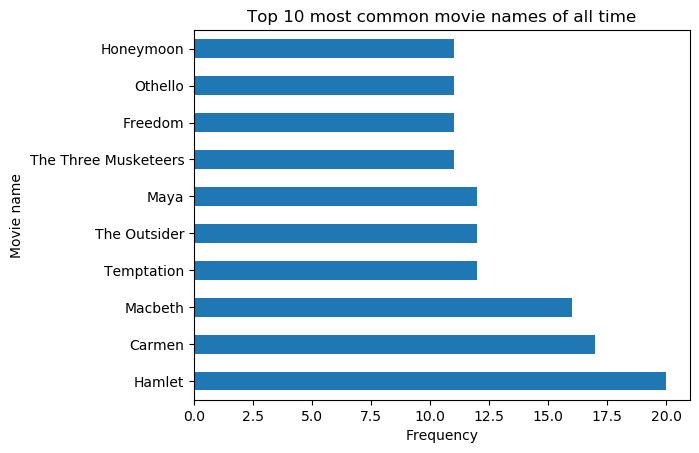

In [34]:
top_ten.plot(kind='barh')
plt.title("Top 10 most common movie names of all time")
plt.ylabel("Movie name")
plt.xlabel("Frequency")
plt.show()

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [35]:
most_movies_years = movies[movies.year>=2000]['year'].value_counts().iloc[:3].index
most_movies = movies[movies.year>=2000]['year'].value_counts().iloc[:3].values

years = ", ".join([str(item) for item in most_movies_years])
movies_m = ", ".join([str(item) for item in most_movies])

f"The following years saw the most movies released: {years} (that was {movies_m} movies respectively)"



'The following years saw the most movies released: 2017, 2016, 2015 (that was 11474, 9440, 8703 movies respectively)'

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [67]:
import math as m
movies['decade'] = movies.year.apply(lambda x: m.floor(x/10)*10)
movies_by_decade = movies.groupby('decade')['year'].count().reset_index().rename(columns={"year":"total"})

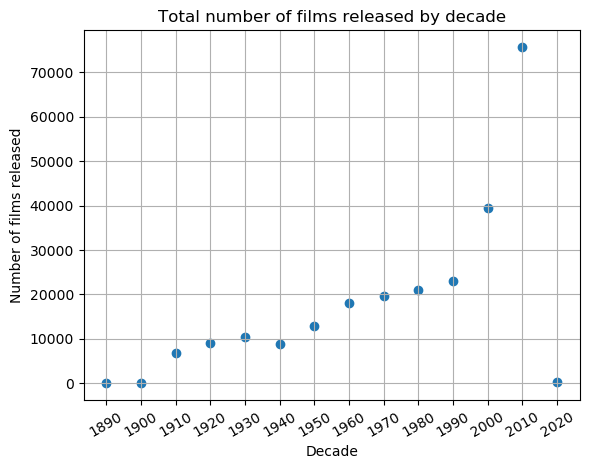

In [76]:
plt.scatter(movies_by_decade['decade'],  movies_by_decade['total'])
plt.grid(True)
plt.xticks(movies_by_decade['decade'], rotation=30)
plt.xlabel("Decade")
plt.ylabel("Number of films released")
plt.title("Total number of films released by decade")
plt.show()

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?


In [79]:
cast.name.value_counts()[:10]

Bess Flowers       835
Herman Hack        702
Sam (II) Harris    667
Harold Miller      624
Lee Phelps         624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Name: name, dtype: int64


(B) Who are the top 10 people most often credited as "Herself" in movie history?



In [82]:
cast[cast.character=='Herself']['name'].value_counts()[:10]

Queen Elizabeth II           12
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Joyce Brothers                9
Margaret Thatcher             8
Hillary Clinton               8
Oprah Winfrey                 6
Marta Berrocal                6
Sumie Sakai                   6
Mar?a Isabel (III) Mart?n     6
Name: name, dtype: int64

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [83]:
cast[cast.character=='Himself']['name'].value_counts()[:10]

Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Ron Jeremy            22
Bill Clinton          22
Benito Mussolini      21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?


In [89]:
cast[cast.character.str.startswith("Zombie")]['character'].value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [90]:
cast[cast.character.str.startswith("Police")]['character'].value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

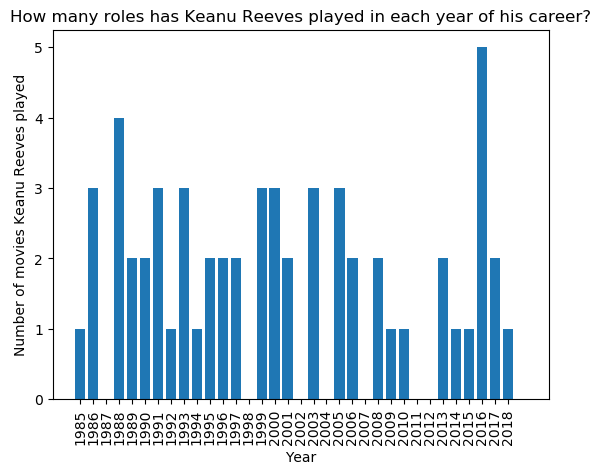

In [122]:
keanu_reeves_movies_year = cast[cast.name=="Keanu Reeves"].groupby('year')['n'].count().reset_index().rename(columns={"n":"total"})

plt.bar(keanu_reeves_movies_year['year'], keanu_reeves_movies_year['total'])
plt.xticks(range(keanu_reeves_movies_year['year'].min(), keanu_reeves_movies_year['year'].max()), rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of movies Keanu Reeves played")
plt.title("How many roles has Keanu Reeves played in each year of his career?")
plt.show()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

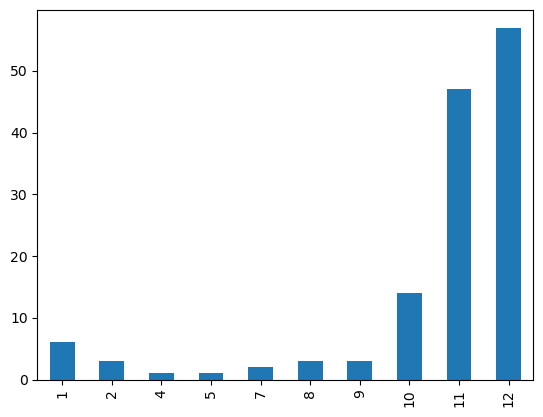

In [38]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [39]:
df = pd.DataFrame({"A":[1,2,3], "B" : [4,5,6]})

In [40]:
import numpy as np

In [41]:
df.apply(np.sqrt)

,A,B
0,1.000000,2.000000
1,1.414214,2.236068
2,1.732051,2.449490
